# <span style="color:blue">Data Analysis: Julia + Gadfly - Scatter Matrix Example</span>

In [167]:
using RDatasets, DataFrames
using Gadfly;

## Load Data

In [68]:
airquality = dataset("datasets", "airquality");

### Data Exploratory Analysis

In [69]:
showcols(airquality)

153x6 DataFrames.DataFrame
| Col # | Name    | Eltype  | Missing |
|-------|---------|---------|---------|
| 1     | Ozone   | Int64   | 37      |
| 2     | Solar_R | Int64   | 7       |
| 3     | Wind    | Float64 | 0       |
| 4     | Temp    | Int64   | 0       |
| 5     | Month   | Int64   | 0       |
| 6     | Day     | Int64   | 0       |

In [70]:
print(head(airquality), "\n\n" , tail(airquality))

6x6 DataFrames.DataFrame
| Row | Ozone | Solar_R | Wind | Temp | Month | Day |
|-----|-------|---------|------|------|-------|-----|
| 1   | 41    | 190     | 7.4  | 67   | 5     | 1   |
| 2   | 36    | 118     | 8.0  | 72   | 5     | 2   |
| 3   | 12    | 149     | 12.6 | 74   | 5     | 3   |
| 4   | 18    | 313     | 11.5 | 62   | 5     | 4   |
| 5   | NA    | NA      | 14.3 | 56   | 5     | 5   |
| 6   | 28    | NA      | 14.9 | 66   | 5     | 6   |

6x6 DataFrames.DataFrame
| Row | Ozone | Solar_R | Wind | Temp | Month | Day |
|-----|-------|---------|------|------|-------|-----|
| 1   | 14    | 20      | 16.6 | 63   | 9     | 25  |
| 2   | 30    | 193     | 6.9  | 70   | 9     | 26  |
| 3   | NA    | 145     | 13.2 | 77   | 9     | 27  |
| 4   | 14    | 191     | 14.3 | 75   | 9     | 28  |
| 5   | 18    | 131     | 8.0  | 76   | 9     | 29  |
| 6   | 20    | 223     | 11.5 | 68   | 9     | 30  |

### <span style="color:red;">New</span> Gadfly Graph Proposition: Scatter-Matrix

Lets suppose that we want to analyse in a quick way the relationship between the variables pair by pair. For this we could use a scatter-matrix graph. What it could support:
- Scatter Plot between two explanatory variables (**Done**).
- Plot a histogram (numeric variable) or barplot (categorical variable) when $x_i = x_i$ in the matrix (**Done**).
- Add basic statistics (μ and σ) for numerical data
- Add correlation tests (Spearman for numerical variable, $\chi^2$ for categorical variable) ().
- Add consistent parametrization like other Gadfly graphs
- Add options to accept different themes for scatter and histogram/bar plots.
- Add support for wrap if we observe that graphs not fit into the screen.

Next I will produce an example of this kind of graph during the Exploratory Data Analysis.

### Scatter-Matrix Code Proposition

In [169]:
reshape_stack(plots, ncols) = vstack(map(i -> hstack(plots[i:i+(ncols-1)]...), 1:ncols:length(plots))...)

function scatter_matrix(dataframe)
    columns = names(dataframe)
    ncols = length(columns)
    
    plots = []
    sizehint!(plots, ncols^2)
    
    for i = 1:ncols, j = 1:ncols
        values = dataframe[:, vcat(columns[i], columns[j])]
        values = values[!isna(values[:,1]),:]
        values = values[!isna(values[:,2]),:]
        if i != j
            p = plot(values, x=columns[i], y=columns[j], Geom.point)
        else
            if eltype(values[:,columns[i]]) <: Number
                title = ""
                if eltype(values[:,columns[i]]) <: AbstractFloat
                    mean_value = round(mean(values[:,columns[i]]), 2)
                    stddev = round(std(values[:,columns[i]]), 2)
                    title = "μ=$mean_value,σ=$stddev"
                end
                p = plot(values, x=columns[i], Geom.histogram, 
                         Guide.title(title))
            else
                p = plot(values, x=columns[i], Stat.histogram, 
                         Scale.y_discrete, Scale.x_discrete, Geom.bar)
            end
        end
        push!(plots, p)
    end
    reshape_stack(plots, ncols)
end

scatter_matrix (generic function with 1 method)

### Scatter-Matrix Use Case

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in hstack at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:895
 in anonymous at In[163]:1
 in map at abstractarray.jl:1279
 in reshape_stack at In[163]:1
 in scatter_matrix at In[163]:29
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[166], in expression starting on line 2
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in default_statistic at /Users/diego/.julia/v0.4/Gadfly/src/guide.jl:557
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:669
 in re

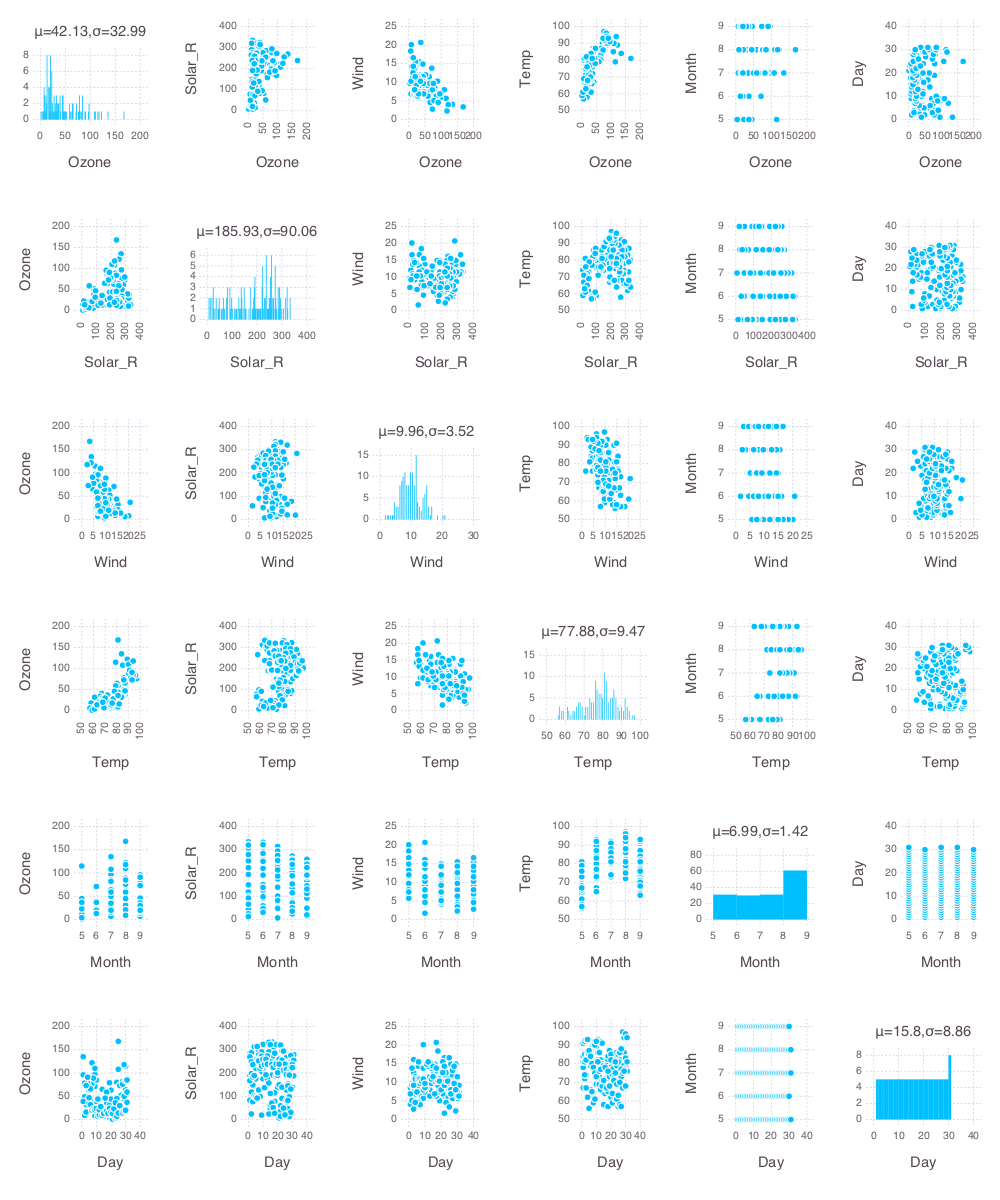

hstack at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:895
 in anonymous at In[163]:1
 in map_to! at abstractarray.jl:1260
 in map at abstractarray.jl:1282
 in reshape_stack at In[163]:1
 in scatter_matrix at In[163]:29
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[166], in expression starting on line 2
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in hstack at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:895
 in anonymous at In[163]:1
 in map_to! at abstractarray.jl:1260
 in map at abstractarray.jl:1282
 in reshape_stack a

In [166]:
set_default_plot_size(1000px, 1200px)
scatter_matrix(airquality)